In [1]:
# import necessory library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,validation_curve
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score,roc_auc_score,roc_curve,auc
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler

In [2]:
url=('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

titanic = pd.read_csv(url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# drop irrelavent columns
titanic.drop(['PassengerId','Name','Ticket','Cabin','E mbarked'],axis=1,inplace=True)

In [5]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
# check the shape
titanic.shape

(891, 7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0B9CC4F40>,
      dtype=object)

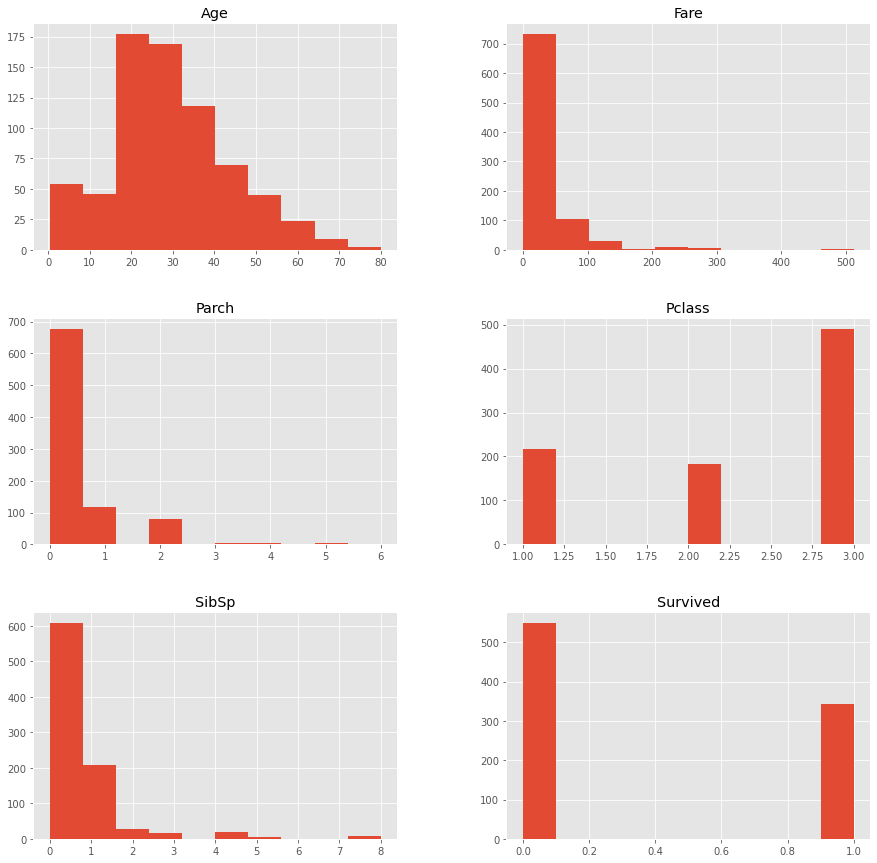

In [7]:
# check the distribution of the data
titanic.hist(figsize=(15,15))

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

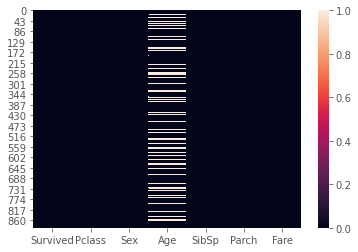

In [8]:
# check the missing values
sns.heatmap(titanic.isnull())
# so age column having null values
titanic.isnull().sum()

In [9]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


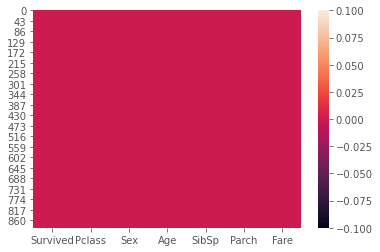

In [10]:
# now again check the null values
print(titanic.isnull().sum())
sns.heatmap(titanic.isnull())

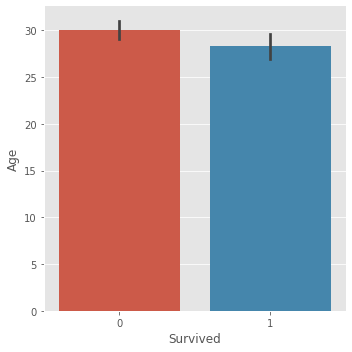

In [11]:
# let's do graphical analysis
sns.catplot('Survived','Age',data=titanic,kind='bar')

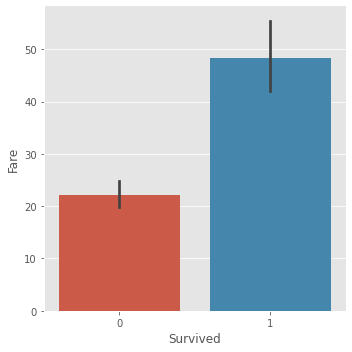

In [12]:
sns.catplot('Survived','Fare',data=titanic,kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0BB0DA520>,
      dtype=object)

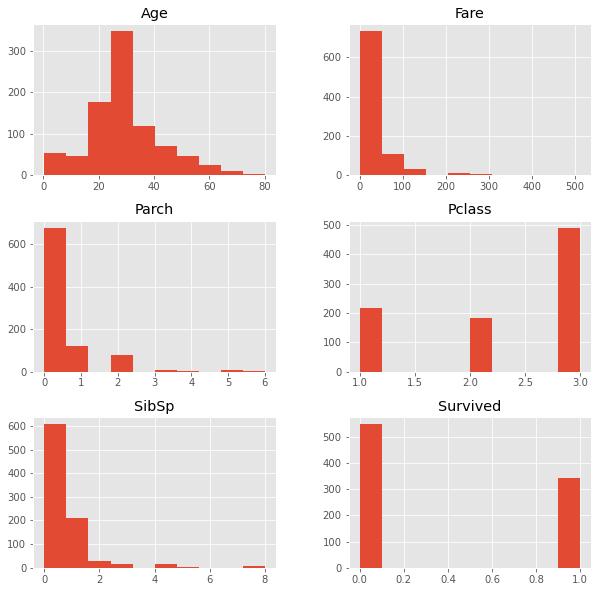

In [13]:
# check the distribution after filling NaN values
titanic.hist(figsize=(10,10))

Survived
0    12142.7199
1    16551.2294
Name: Fare, dtype: float64


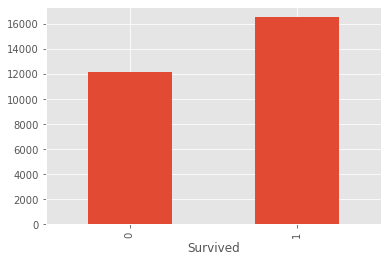

In [14]:
# total fare by survived
g = titanic.groupby(['Survived']).sum()['Fare']
print(g)
g.plot.bar()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


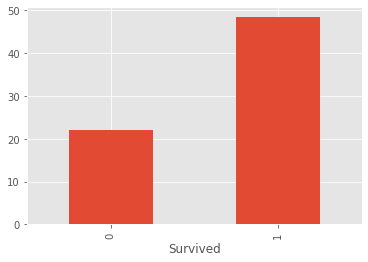

In [15]:
# Average fare by survived
g = titanic.groupby(['Survived']).mean()['Fare']
print(g)
g.plot.bar()

Survived          0          1
Sex                           
female    25.666667  28.716738
male      30.783120  27.382294


Text(0, 0.5, 'Age')

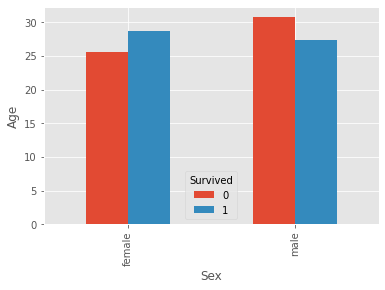

In [16]:
# average age by sex discriminated by survived
g = titanic.groupby(['Sex','Survived']).mean().unstack()['Age']
print(g)
g.plot.bar()
plt.ylabel('Age')

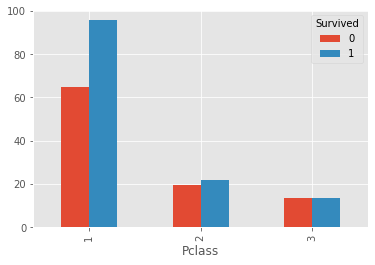

In [17]:
# average fare by pclass
g = titanic.groupby(['Pclass','Survived']).mean().unstack()['Fare']
g.plot.bar()

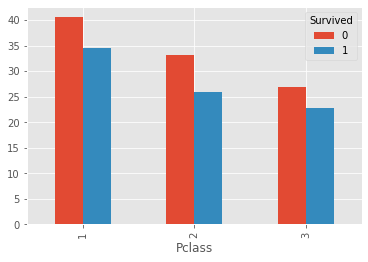

In [18]:
# average age by pclass
g = titanic.groupby(['Pclass','Survived']).mean().unstack()['Age']
g.plot.bar()

In [19]:
# create dummy trap for features
pclass = pd.get_dummies(titanic['Pclass'],drop_first=True)

sex = pd.get_dummies(titanic['Sex'],drop_first=True)

In [20]:
df = pd.concat([titanic,pclass,sex],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,2,3,male
0,0,3,male,22.0,1,0,7.2500,0,1,1
1,1,1,female,38.0,1,0,71.2833,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,1,0
3,1,1,female,35.0,1,0,53.1000,0,0,0
4,0,3,male,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1,0,1
887,1,1,female,19.0,0,0,30.0000,0,0,0
888,0,3,female,28.0,1,2,23.4500,0,1,0
889,1,1,male,26.0,0,0,30.0000,0,0,1


In [21]:
# now drop pclass & sex
df.drop(['Pclass','Sex'],axis=1,inplace=True)

In [22]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

In [23]:
# scalling the data because all the features on different scalling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
# do train_test_split
xtrain,xtest,ytrain,ytest   = train_test_split(x_scaled,y,test_size=.25,random_state=24)

In [25]:
# checking shape
print('xtrain', xtrain.shape)
print('ytrain',ytrain.shape)

print('xtest',xtest.shape)
print('ytest',ytest.shape)

xtrain (668, 7)
ytrain (668,)
xtest (223, 7)
ytest (223,)


In [26]:
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)
ytrain_pred = clf.predict(xtrain)
ytest_pred = clf.predict(xtest)

In [27]:
train_accuracy = accuracy_score(ytrain,ytrain_pred)
train_accuracy

0.9850299401197605

In [28]:
test_accuracy = accuracy_score(ytest,ytest_pred)
test_accuracy

0.7623318385650224

In [29]:
# let's try model building & evaltion by cross validation because it gives more stable accuracy
score = cross_val_score(clf,x_scaled,y,cv=5)
print('cv score ' , np.mean(score))

cv score  0.7868307074257737


In [30]:
# use other evalution matrics
confusion_mat = confusion_matrix(ytest,ytest_pred)
print(confusion_mat)

[[117  27]
 [ 26  53]]


In [31]:
print(f1_score(ytest,ytest_pred))

0.6666666666666666


In [32]:
print(recall_score(ytest,ytest_pred))

0.6708860759493671


In [33]:
print(precision_score(ytest,ytest_pred))

0.6625


In [34]:
# classification_report
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       144
           1       0.66      0.67      0.67        79

    accuracy                           0.76       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223



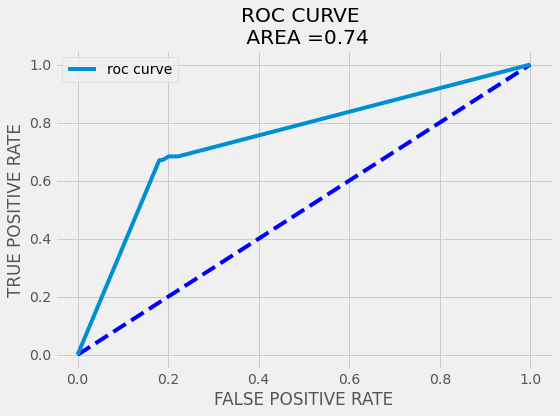

In [36]:
# roc curve
ytest_prob = clf.predict_proba(xtest)[:,1]

fpr , tpr ,threshold = roc_curve(ytest,ytest_prob)
AUC = roc_auc_score(ytest,ytest_prob)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr,tpr,label='roc curve')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVE \n AREA ={:.2f}'.format(AUC))
plt.legend()
plt.tight_layout()